# 6.3 Geographic Visualization 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 
country_geo = r'C:\Users\E054746\OneDrive - RSM\Data Analytics\CareerFoundry\Data Immersion\Achievement 6\6.3\us-states.json'

In [4]:
# Create Path to create folder into a string
path = r'C:\Users\E054746\OneDrive - RSM\Data Analytics\CareerFoundry\Data Immersion\Achievement 6\US Regional Sales Analysis'

In [5]:
# Import US Regional Sales Data (scrubbed version)
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_regional_sales_clean_020222.pkl'))

In [6]:
df.head()

,Order_Number,Sales_Channel,Warehouse_Code,Procured_Date,Order_Date,Months_In_Stock,Ship_Date,Days_To_Process_Order,Delivery_Date,Days_In_Transit,...,State,Type,Latitude,Longitude,Population,Household_Income,Median_Income,Time_Zone,Region,Sales_Team
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,5,2018-06-14,14,2018-06-19,5,...,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
1,SO - 0005035,In-Store,WARE-UHY1004,2019-08-23,2020-01-08,4,2020-01-15,7,2020-01-21,6,...,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
2,SO - 0006409,In-Store,WARE-UHY1004,2020-03-10,2020-06-17,3,2020-07-03,16,2020-07-12,9,...,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
3,SO - 0006713,In-Store,WARE-UHY1004,2020-03-10,2020-07-21,4,2020-08-15,25,2020-08-16,1,...,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
4,SO - 0007028,In-Store,WARE-NMK1003,2020-06-18,2020-08-29,2,2020-09-11,13,2020-09-14,3,...,Connecticut,Town,41.55850,-73.03668,108802,40213,40467,America/New York,Northeast,Joshua Bennett


In [7]:
df.shape

(7991, 37)

In [8]:
df.columns

Index(['Order_Number', 'Sales_Channel', 'Warehouse_Code', 'Procured_Date',
       'Order_Date', 'Months_In_Stock', 'Ship_Date', 'Days_To_Process_Order',
       'Delivery_Date', 'Days_In_Transit', 'SalesTeam_ID', 'Customer_ID',
       'Store_ID', 'Product_ID', 'Order_Quantity', 'Discount_Applied',
       'Unit_Price', 'Unit_Cost', 'Discounted_Price_PU', 'Total_Sale',
       'Total Cost', 'Total Profit', 'Customer_Names', 'Product_Name',
       'City_Name', 'County', 'State_Code', 'State', 'Type', 'Latitude',
       'Longitude', 'Population', 'Household_Income', 'Median_Income',
       'Time_Zone', 'Region', 'Sales_Team'],
      dtype='object')

### 2. Data wrangling 

##### Create a Price Category Range

In [9]:
df.loc[df['Unit_Price'] < 1000.0, 'Price category'] = 'Low price'

In [10]:
df.loc[(df['Unit_Price'] >= 1000.0) & (df['Unit_Price'] < 3000.0), 'Price category'] = 'Mid price'

In [11]:
df.loc[df['Unit_Price'] >= 3000.0, 'Price category'] = 'High price'

In [12]:
df['Price category'].value_counts(dropna = False)

Mid price     3939
High price    2327
Low price     1725
Name: Price category, dtype: int64

##### Create a Household Income Range

In [13]:
df.loc[df['Household_Income'] < 40000, 'HH income category'] = 'Lower income'

In [14]:
df.loc[(df['Household_Income'] >= 40000) & (df['Household_Income'] < 95000), 'HH income category'] = 'Mid income'

In [15]:
df.loc[df['Household_Income'] >= 95000, 'HH income category'] = 'High income'

In [16]:
df['HH income category'].value_counts(dropna = False)

Mid income      4744
High income     1832
Lower income    1415
Name: HH income category, dtype: int64

##### Create a range for total sales

In [17]:
df.loc[df['Total_Sale'] < 10000, 'Sales Range'] = 'Lower sales'

In [18]:
df.loc[(df['Total_Sale'] >= 10000) & (df['Total_Sale'] < 30000), 'Sales Range'] = 'Mid-Level sales'

In [19]:
df.loc[df['Total_Sale'] >= 30000, 'Sales Range'] = 'High sales'

In [20]:
df['Sales Range'].value_counts(dropna = False)

Lower sales        5393
Mid-Level sales    2306
High sales          292
Name: Sales Range, dtype: int64

In [21]:
df.columns

Index(['Order_Number', 'Sales_Channel', 'Warehouse_Code', 'Procured_Date',
       'Order_Date', 'Months_In_Stock', 'Ship_Date', 'Days_To_Process_Order',
       'Delivery_Date', 'Days_In_Transit', 'SalesTeam_ID', 'Customer_ID',
       'Store_ID', 'Product_ID', 'Order_Quantity', 'Discount_Applied',
       'Unit_Price', 'Unit_Cost', 'Discounted_Price_PU', 'Total_Sale',
       'Total Cost', 'Total Profit', 'Customer_Names', 'Product_Name',
       'City_Name', 'County', 'State_Code', 'State', 'Type', 'Latitude',
       'Longitude', 'Population', 'Household_Income', 'Median_Income',
       'Time_Zone', 'Region', 'Sales_Team', 'Price category',
       'HH income category', 'Sales Range'],
      dtype='object')

In [22]:
# Select only the necessary columns call this list columns

columns = ['Sales_Channel',   
'Order_Quantity',  
'Unit_Price', 
'Unit_Cost', 
'Discounted_Price_PU', 
'Total_Sale',
'Total Cost', 
'Total Profit', 
'Customer_Names', 
'Product_Name',
'City_Name', 
'County', 
'State_Code', 
'State', 
'Type', 
'Latitude',
'Longitude', 
'Population', 
'Household_Income', 
'Median_Income',
'Region', 
'Sales_Team',
'Price category',
'HH income category', 
'Sales Range'           
]

In [23]:
# Create a subset

sales_sub = df[columns]

In [24]:
sales_sub.columns

Index(['Sales_Channel', 'Order_Quantity', 'Unit_Price', 'Unit_Cost',
       'Discounted_Price_PU', 'Total_Sale', 'Total Cost', 'Total Profit',
       'Customer_Names', 'Product_Name', 'City_Name', 'County', 'State_Code',
       'State', 'Type', 'Latitude', 'Longitude', 'Population',
       'Household_Income', 'Median_Income', 'Region', 'Sales_Team',
       'Price category', 'HH income category', 'Sales Range'],
      dtype='object')

In [25]:
sales_sub.head()

,Sales_Channel,Order_Quantity,Unit_Price,Unit_Cost,Discounted_Price_PU,Total_Sale,Total Cost,Total Profit,Customer_Names,Product_Name,...,Latitude,Longitude,Population,Household_Income,Median_Income,Region,Sales_Team,Price category,HH income category,Sales Range
0,In-Store,5,1963.1,1001.181,1815.8675,9079.3375,5005.905,4073.4325,Rochester Ltd,Dining Furniture,...,40.64092,-73.31669,213776,68789,80327,Northeast,Joshua Bennett,Mid price,Mid income,Lower sales
1,In-Store,3,1755.4,1298.996,1492.0900,4476.2700,3896.988,579.2820,Niconovum Corp,Cookware,...,40.64092,-73.31669,213776,68789,80327,Northeast,Joshua Bennett,Mid price,Mid income,Lower sales
2,In-Store,5,3544.3,2020.251,3278.4775,16392.3875,10101.255,6291.1325,Weimei Corp,Stemware,...,40.64092,-73.31669,213776,68789,80327,Northeast,Joshua Bennett,High price,Mid income,Mid-Level sales
3,In-Store,3,2492.4,1246.200,2305.4700,6916.4100,3738.600,3177.8100,"Fenwal, Corp",Computers,...,40.64092,-73.31669,213776,68789,80327,Northeast,Joshua Bennett,Mid price,Mid income,Lower sales
4,In-Store,3,3993.2,3034.832,3194.5600,9583.6800,9104.496,479.1840,Winthrop,Mirrors,...,41.55850,-73.03668,108802,40213,40467,Northeast,Joshua Bennett,High price,Mid income,Lower sales


In [26]:
type(sales_sub)

pandas.core.frame.DataFrame

### 3. Conduct consistency checks

In [27]:
# Check for missing values

sales_sub.isnull().sum() # No duplicates found

Sales_Channel          0
Order_Quantity         0
Unit_Price             0
Unit_Cost              0
Discounted_Price_PU    0
Total_Sale             0
Total Cost             0
Total Profit           0
Customer_Names         0
Product_Name           0
City_Name              0
County                 0
State_Code             0
State                  0
Type                   0
Latitude               0
Longitude              0
Population             0
Household_Income       0
Median_Income          0
Region                 0
Sales_Team             0
Price category         0
HH income category     0
Sales Range            0
dtype: int64

##### Duplicates check

In [28]:
dups = sales_sub.duplicated()

In [29]:
dups.shape # no dups

(7991,)

##### Extreme values checks

<AxesSubplot:xlabel='Household_Income', ylabel='Count'>

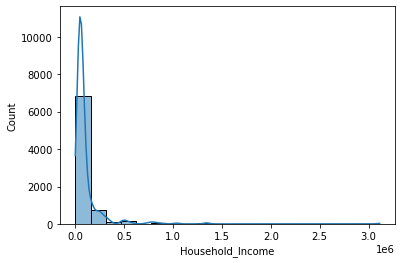

In [30]:
sns.histplot(sales_sub['Household_Income'], bins=20, kde = True) # shows extreme values for Household income. Looks normal. 

<AxesSubplot:xlabel='Order_Quantity', ylabel='Count'>

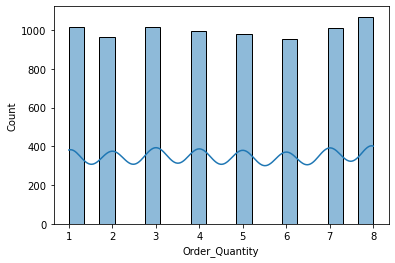

In [31]:
sns.histplot(sales_sub['Order_Quantity'], bins=20, kde = True) # shows extreme values for number of orders. Looks normal. 

<AxesSubplot:xlabel='Total_Sale', ylabel='Count'>

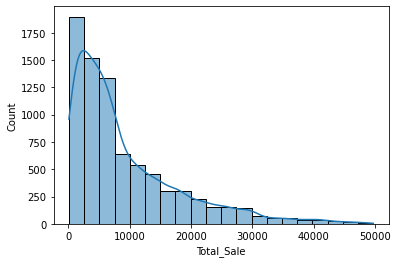

In [32]:
sns.histplot(sales_sub['Total_Sale'], bins=20, kde = True) # shows extreme values for total sale. Looks normal.

<AxesSubplot:xlabel='Unit_Price', ylabel='Count'>

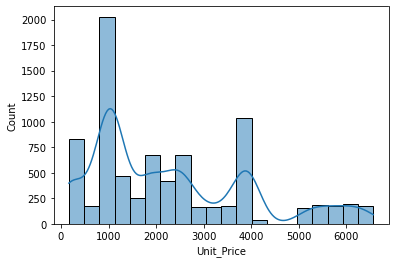

In [33]:
sns.histplot(sales_sub['Unit_Price'], bins=20, kde = True) # shows extreme values for number unit_price. Looks normal.

In [34]:
# Check how many extreme values

sales_sub[sales_sub['Unit_Price'] >4000] #Looks normal

,Sales_Channel,Order_Quantity,Unit_Price,Unit_Cost,Discounted_Price_PU,Total_Sale,Total Cost,Total Profit,Customer_Names,Product_Name,...,Latitude,Longitude,Population,Household_Income,Median_Income,Region,Sales_Team,Price category,HH income category,Sales Range
7,In-Store,7,5762.0,3514.820,5329.8500,37308.950,24603.740,12705.210,"Exact-Rx, Corp",Dinnerware,...,32.68695,-97.02110,187809,59196,56475,South,Joshua Bennett,High price,Mid income,High sales
16,In-Store,6,5487.3,4060.602,5075.7525,30454.515,24363.612,6090.903,U.S. Ltd,Computers,...,34.95303,-120.43572,105093,27365,50433,West,Joshua Bennett,High price,Lower income,High sales
17,In-Store,7,6210.9,4223.412,5900.3550,41302.485,29563.884,11738.601,Amylin Group,Table Lamps,...,30.17256,-95.50981,102911,38114,109917,South,Joshua Bennett,High price,Lower income,High sales
30,In-Store,2,5266.2,4212.960,4871.2350,9742.470,8425.920,1316.550,E. Ltd,Bakeware,...,37.97476,-87.55585,119943,51271,35785,Midwest,Joshua Bennett,High price,Mid income,Lower sales
31,In-Store,2,5956.3,4467.225,5509.5775,11019.155,8934.450,2084.705,Ascend Ltd,Outdoor Decor,...,32.46098,-84.98771,200579,72760,42306,South,Joshua Bennett,High price,Mid income,Mid-Level sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7937,In-Store,2,5567.7,3284.943,5010.9300,10021.860,6569.886,3451.974,"Elorac, Corp",Accessories,...,41.94563,-88.08462,113024,40097,68474,Midwest,Stephen Payne,High price,Mid income,Mid-Level sales
7952,In-Store,5,5226.0,3240.120,4442.1000,22210.500,16200.600,6009.900,Llorens Ltd,Outdoor Decor,...,47.38093,-122.23484,126952,42233,60191,West,Stephen Payne,High price,Mid income,Mid-Level sales
7969,In-Store,6,5085.3,2186.679,4831.0350,28986.210,13120.074,15866.136,Llorens Ltd,Wall Frames,...,39.11417,-94.62746,151306,54629,38749,Midwest,Stephen Payne,High price,Mid income,Mid-Level sales
7970,In-Store,6,5540.9,4100.266,4432.7200,26596.320,24601.596,1994.724,Eminence Corp,Wardrobes,...,39.11417,-94.62746,151306,54629,38749,Midwest,Stephen Payne,High price,Mid income,Mid-Level sales


In [35]:
sales_sub.dtypes

Sales_Channel           object
Order_Quantity           int64
Unit_Price             float64
Unit_Cost              float64
Discounted_Price_PU    float64
Total_Sale             float64
Total Cost             float64
Total Profit           float64
Customer_Names          object
Product_Name            object
City_Name               object
County                  object
State_Code              object
State                   object
Type                    object
Latitude               float64
Longitude              float64
Population               int64
Household_Income         int64
Median_Income            int64
Region                  object
Sales_Team              object
Price category          object
HH income category      object
Sales Range             object
dtype: object

### 4. Plotting a choropleth

In [36]:
# Create a data frame with just the states and the values for order quantity

data_to_plot = sales_sub[['State','Order_Quantity']]
data_to_plot.head()

,State,Order_Quantity
0,New York,5
1,New York,3
2,New York,5
3,New York,3
4,Connecticut,3


In [37]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State','Order_Quantity'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Number of Orders").add_to(map)
folium.LayerControl().add_to(map)

map

#### Convert two columns into a data dictionary

In [38]:
zip(df.SalesTeam_ID, df.Sales_Team)

In [39]:
type(zip(df.SalesTeam_ID, df.Sales_Team))

zip

In [40]:
list(zip(df.SalesTeam_ID, df.Sales_Team))

[(6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Bennett'),
 (6, 'Joshua Ben

In [41]:
dict(zip(df.SalesTeam_ID, df.Sales_Team))

{6: 'Joshua Bennett',
 12: 'Carl Nguyen',
 2: 'Keith Griffin',
 18: 'Shawn Wallace',
 24: 'Roy Rice',
 4: 'Chris Armstrong',
 11: 'Joshua Little',
 19: 'Nicholas Cunningham',
 21: 'Samuel Fowler',
 26: 'Donald Reynolds',
 15: 'Roger Alexander',
 10: 'Jonathan Hawkins',
 23: 'Douglas Tucker',
 9: 'Joshua Ryan',
 16: 'Anthony Berry',
 25: 'Patrick Graham',
 22: 'Joe Price',
 20: 'Anthony Torres',
 1: 'Adam Hernandez',
 13: 'Todd Roberts',
 3: 'Jerry Green',
 14: 'Paul Holmes',
 17: 'Frank Brown',
 7: 'Shawn Cook',
 28: 'Carlos Miller',
 27: 'Shawn Torres',
 8: 'George Lewis',
 5: 'Stephen Payne'}

#### Create a data frame with just states and salesteam_id

In [42]:
# Create a data frame with just the states and the values for salesteam_ID

team_data_to_plot = df[['State','SalesTeam_ID']] #Used original df because I dropped ID in sales_sub df
team_data_to_plot.head()

,State,SalesTeam_ID
0,New York,6
1,New York,6
2,New York,6
3,New York,6
4,Connecticut,6


In [43]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = team_data_to_plot,
    columns = ['State','SalesTeam_ID'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Sales Team").add_to(map)
folium.LayerControl().add_to(map)

map

#### Create another choropleth graph with states and income range cattegories

##### Create a Household Income Range categories but ranking using numbers for the sales_sub data frame

In [74]:
sales_sub.loc[df['Household_Income'] < 40000, 'income category'] =1 # Where 1 is low income

C:\Users\E054746\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [75]:
sales_sub.loc[(df['Household_Income'] >= 40000) & (df['Household_Income'] < 95000), 'income category'] =2 # where to is mid-level income

In [76]:
sales_sub.loc[df['Household_Income'] >= 95000, 'income category'] =3 # where 3 is high income

In [68]:
sales_sub['income category'].value_counts(dropna = False)

2    4744
3    1832
1    1415
Name: income category, dtype: int64

In [78]:
sales_sub.dtypes

Sales_Channel           object
Order_Quantity           int64
Unit_Price             float64
Unit_Cost              float64
Discounted_Price_PU    float64
Total_Sale             float64
Total Cost             float64
Total Profit           float64
Customer_Names          object
Product_Name            object
City_Name               object
County                  object
State_Code              object
State                   object
Type                    object
Latitude               float64
Longitude              float64
Population               int64
Household_Income         int64
Median_Income            int64
Region                  object
Sales_Team              object
Price category          object
HH income category      object
Sales Range             object
income category         object
dtype: object

In [70]:
# Change income category to int64 to create choropleth graph
sales_sub['income category'].astype(int)

0       2
1       2
2       2
3       2
4       2
       ..
7986    2
7987    2
7988    2
7989    3
7990    2
Name: income category, Length: 7991, dtype: int32

In [71]:
sales_sub.dtypes

Sales_Channel           object
Order_Quantity           int64
Unit_Price             float64
Unit_Cost              float64
Discounted_Price_PU    float64
Total_Sale             float64
Total Cost             float64
Total Profit           float64
Customer_Names          object
Product_Name            object
City_Name               object
County                  object
State_Code              object
State                   object
Type                    object
Latitude               float64
Longitude              float64
Population               int64
Household_Income         int64
Median_Income            int64
Region                  object
Sales_Team              object
Price category          object
HH income category      object
Sales Range             object
income category         object
dtype: object

In [80]:
# Create a data frame with just the states and the income category

income_data_to_plot = sales_sub[['State','income category']] 
income_data_to_plot.head()

,State,income category
0,New York,2
1,New York,2
2,New York,2
3,New York,2
4,Connecticut,2


In [81]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = income_data_to_plot,
    columns = ['State','income category'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Income Range").add_to(map)
folium.LayerControl().add_to(map)

map

### Question 8 Discuss the results and what they mean in a markdown section.

#### Response
- For the first choropleth graph, I was surprised to see that the midwest placed the most quantity of orders. The number of orders range from 1-8. This is surprising because I noted in my previous task that the West was the highest performing region when it comes to the number orders - see chart below. This may imply that while the midwest may order in higher quantities, this region may not order as frequently. 
- As for the second graph, I thought I would get a better idea as two which salesperson has the most orders, but I don't believe a choroplath is the right graph to gain insights. 
- Yomma, please note that I tried changing the falgged column, income category from object to float and integer, but the numbers appear as an object and therefore, a map cannot be plotted. 

C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


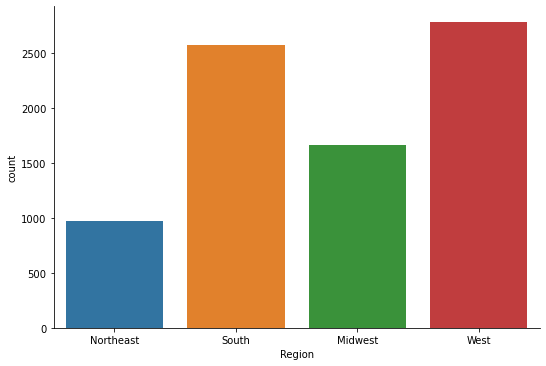

In [53]:
# plot the number of orders by region
sns.factorplot('Region', data=df, kind='count', aspect=1.5)

In [86]:
# create a numpy array of length 6 and has linear spacing from the nimum total income to the maximum total income
threshold_scale = np.linspace(sales_sub['Household_Income'].min(),
                            sales_sub['Household_Income'].max(),
                            6, dtype=int)
threshold_scale = threshold_scale.tolist() #change the numpy array to list
threshold_scale[-1] = threshold_scale[-1] +1 #last value of the list must be greater than the maximum income

In [87]:
# Create a data frame with just the states and the values for order quantity

order_data_to_plot = sales_sub[['Population','Order_Quantity']]
order_data_to_plot.head()

,Population,Order_Quantity
0,213776,5
1,213776,3
2,213776,5
3,213776,3
4,108802,3


In [88]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = order_data_to_plot,
    columns = ['Population','Order_Quantity'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Number of Orders").add_to(map)
folium.LayerControl().add_to(map)

map # Two dimensions did not work